In [1]:
# datasets are not present physically ie in .csv Format
# datasets in PCA are present within sklearn.datasets
#sklearn.datasets is an inbuilt library that consists wit all the data sets for PCA

# we shall be using load_digit dataset from sklearn.datasets library today to perform PCA case study


## Importing dataset from SKlearn

In [3]:
from sklearn import datasets
from sklearn.datasets import load_digits

In [4]:
# Returns all the datasets in the library
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [5]:
# The entire datasets are stored as dictionaries

In [6]:
dataset = load_digits()

In [7]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Each data point is an 8x8 image of a digit**

**load_digits is a dataset containing 8x8 images of handwritten digits (from 0 to 9).**

**Each image is flattened into a 1D array with 64 values (since 8 × 8 = 64 pixels), where each value corresponds to the intensity of a pixel (ranging between 0 and 16)**

In [10]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Importing preliminary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [14]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [15]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Visualization

<Figure size 640x480 with 0 Axes>

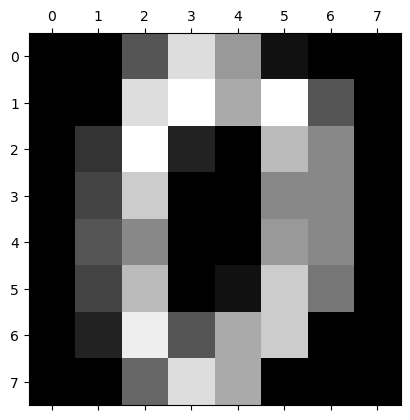

In [18]:
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))
plt.show()

<Figure size 640x480 with 0 Axes>

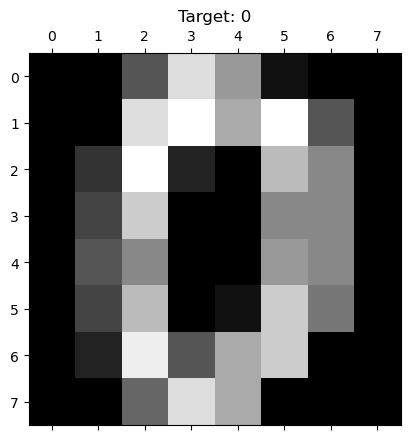

In [19]:
plt.gray()
plt.matshow(dataset.images[0])
plt.title(f"Target: {dataset.target[0]}")
plt.show()

<Figure size 640x480 with 0 Axes>

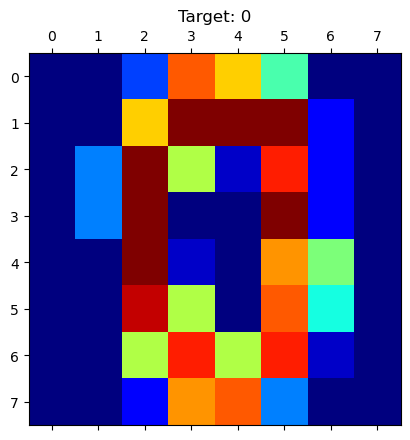

In [20]:
plt.jet()
plt.matshow(dataset.images[20])
plt.title(f"Target: {dataset.target[20]}")
plt.show()

<Figure size 640x480 with 0 Axes>

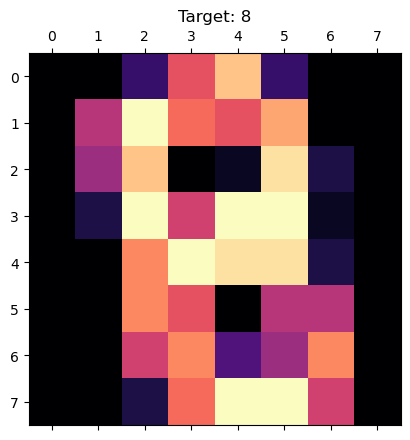

In [21]:
plt.magma()
plt.matshow(dataset.images[500])
plt.title(f"Target: {dataset.target[500]}")
plt.show()

#### Color Maps

Popular Colormaps to Try:
viridis (default in Matplotlib) – Good for perceptual uniformity.
plasma – A warm, colorful colormap.
inferno – Dark background with bright colors.
magma – Similar to inferno but with more contrast.
cividis – Good for colorblind-friendly visualizations.
jet – A rainbow-style colormap (though less recommended for precise interpretation).


In [24]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

<Figure size 640x480 with 0 Axes>

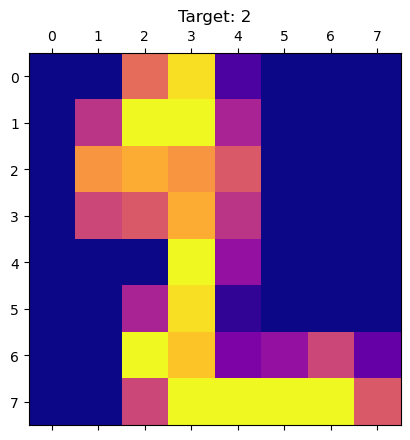

In [25]:
plt.plasma()
plt.matshow(dataset.images[600])
plt.title(f"Target: {dataset.target[600]}")
plt.show()

<Figure size 640x480 with 0 Axes>

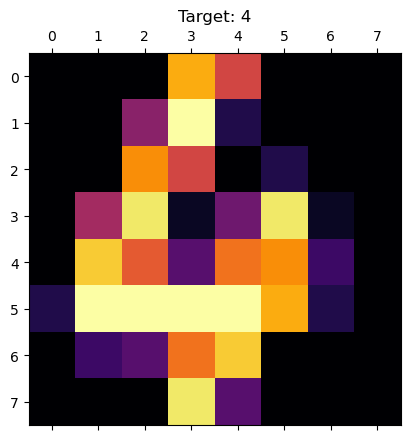

In [26]:
plt.inferno()
plt.matshow(dataset.images[800])
plt.title(f"Target: {dataset.target[800]}")
plt.show()

#### Shape of Images data

In [28]:
np.shape(dataset.images)

(1797, 8, 8)

#### Shape of data

In [30]:
np.shape(dataset.data)

(1797, 64)

In [31]:
dataset.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Performing PCA

In [35]:
X = df
y = dataset.target

In [36]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("PCA", PCA(0.95))
])

In [39]:
X_pca = pca_pipeline.fit_transform(X)

In [40]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.81405925,
         0.0249306 ,  0.32193146],
       [ 0.58898033,  0.9246358 ,  3.92475494, ...,  0.20026094,
         0.08710843, -0.48914299],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.214596  ,
        -1.2788745 ,  0.54583387],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ...,  0.60136463,
         0.41238798,  1.20886377],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.43756556,
        -0.69863483, -0.44339963],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38108638,
         0.12855104,  1.32137195]])

In [41]:
pca_df = pd.DataFrame(X_pca)

In [42]:
pca_df.shape

(1797, 40)

In [43]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.534683,-0.017979,0.047950,0.019124,0.117190,0.709049,0.082410,0.814059,0.024931,0.321931
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,1.098196,-1.144159,0.037744,0.371680,-0.671299,-0.004144,-0.246765,0.200261,0.087108,-0.489143
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,-0.749792,0.487304,-1.356959,-0.107016,0.149503,-0.089290,0.408216,-0.214596,-1.278875,0.545834
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,0.268599,0.875580,0.117581,-0.470575,-0.148854,0.234044,0.396726,0.197436,0.772751,-0.050325
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,-0.660454,-0.360253,0.268121,0.499444,-0.263106,-0.583008,-0.174328,-0.215579,-0.133426,0.184994


In [44]:
print(f"Explained variance ration: {pca_pipeline.named_steps["PCA"].explained_variance_ratio_}")

Explained variance ration: [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163]


## Train, Test, Split

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.metrics import classification_report

## Implementing Logistic Regression

In [51]:
lr_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(0.95)),
    ('lr', LogisticRegression(max_iter=1000, C=1.0, random_state=42))
])

lr_cross = cross_val_score(lr_pipeline, X_train, y_train, cv=5)
print(f"cross validation score: {lr_cross}")
print(f"cross validation score mean: {np.mean(lr_cross)}")

lr_pipeline.fit(X_train,y_train)
lr_predict = lr_pipeline.predict(X_test)
print("Logistic Regression Classification report")
print(classification_report(y_test, lr_predict))

cross validation score: [0.94444444 0.95238095 0.9561753  0.96414343 0.92828685]
cross validation score mean: 0.9490861949029279
Logistic Regression Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.96      1.00      0.98        47
           3       1.00      0.94      0.97        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.96      0.98        55
           8       0.89      0.95      0.92        43
           9       0.97      0.97      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



**There is an overall balance between all the classes and the model is performing at 97% of performance metrics**

In [53]:
lr_predict

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 4, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [54]:
lr_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('lr', LogisticRegression(max_iter=1000, C=1.0, random_state=42))
])

lr_cross = cross_val_score(lr_pipeline, X_train, y_train, cv=5)
print(f"cross validation score: {lr_cross}")
print(f"cross validation score mean: {np.mean(lr_cross)}")

lr_pipeline.fit(X_train,y_train)
lr_predict = lr_pipeline.predict(X_test)
print("Logistic Regression Classification report")
print(classification_report(y_test, lr_predict))

cross validation score: [0.92460317 0.94444444 0.94422311 0.94422311 0.92430279]
cross validation score mean: 0.9363593246063365
Logistic Regression Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.93      0.86      0.90        50
           2       0.90      0.94      0.92        47
           3       0.96      0.89      0.92        54
           4       0.95      0.98      0.97        60
           5       0.95      0.91      0.93        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.82      0.98      0.89        43
           9       0.90      0.88      0.89        59

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



**We get an overall balance between each class. We all also get balanced precision, recall, f1-score and accuracy**

In [56]:
ex_var_ratio = lr_pipeline.named_steps["pca"].explained_variance_ratio_

In [57]:
ex_var_ratio

array([0.12139767, 0.09709345, 0.08590108, 0.06448386, 0.04905909,
       0.04319224, 0.0392287 , 0.03358589, 0.03065292, 0.02927382,
       0.02771458, 0.02551818, 0.02264002, 0.02248655, 0.02113193,
       0.01906949, 0.017551  , 0.01629175, 0.01584415, 0.01523862])

In [58]:
np.sum(ex_var_ratio)

0.7973549840891774

**With n_components=20, we were able to retain almost 80% of the original variance. Even after losing 20% of the original variance, our model is performing at 94% on performance metrics**

# LDA

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [62]:
lda_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA(n_components=9))
])

In [63]:
df_lda = lda_pipeline.fit_transform(X,y)

In [64]:
df_lda

array([[ 2.01463220e+00,  5.62348616e+00, -1.86594028e-01, ...,
        -1.09348511e-01, -1.83506669e-01, -9.65495420e-01],
       [-2.20967396e-01, -3.59240033e+00,  2.14901657e+00, ...,
        -1.23115093e-01, -3.39210556e+00,  1.20766919e+00],
       [-2.23485453e+00, -2.70950363e+00,  4.26992781e+00, ...,
         2.51256615e+00,  1.08370006e+00, -4.22490736e-03],
       ...,
       [ 1.04697178e+00, -1.48367733e+00,  3.04170263e+00, ...,
         1.54913444e+00,  1.99315402e+00, -2.17737830e+00],
       [-4.07872916e-01,  1.99167301e+00, -3.65835518e-01, ...,
         9.16595358e-01,  5.26856349e-01,  1.41509141e+00],
       [-1.74145011e-01, -8.87174627e-01,  1.37776831e+00, ...,
        -5.14965352e-02,  3.18833067e+00, -6.91242304e-01]])

In [65]:
df_lda = pd.DataFrame(df_lda)

In [66]:
df_lda.shape

(1797, 9)

In [67]:
df_lda.head()

,0,1,2,3,4,5,6,7,8
0,2.014632,5.623486,-0.186594,-2.800109,0.443373,0.579755,-0.109349,-0.183507,-0.965495
1,-0.220967,-3.592400,2.149017,-0.114046,-2.054971,-2.222544,-0.123115,-3.392106,1.207669
2,-2.234855,-2.709504,4.269928,-2.147419,1.737674,-1.281434,2.512566,1.083700,-0.004225
3,-2.760965,0.624427,0.158751,1.247578,-0.066359,0.805282,-2.963266,-1.575261,-0.020835
4,5.845449,-1.754015,0.400295,-1.376300,-0.312251,-0.461142,-1.367118,0.665557,-0.132020


In [68]:
X_lda = df_lda

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

In [70]:
print(X_train.shape)
print(X_test.shape)

(1257, 9)
(540, 9)


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA(n_components=9)),
    ("dt", DecisionTreeClassifier(random_state=42))
])

dt_cross = cross_val_score(dt_pipeline, X_train, y_train, cv=5)
print(f"cross validation score: {dt_cross}")
print(f"cross validation mean: {np.mean(dt_cross)}")

dt_pipeline.fit(X_train, y_train)
dt_predict = dt_pipeline.predict(X_test)
print("Classification reprort")
print(classification_report(y_test, dt_predict))

cross validation score: [0.87698413 0.87698413 0.87250996 0.87649402 0.90836653]
cross validation mean: 0.8822677543793083
Classification reprort
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.86      0.76      0.81        50
           2       0.93      0.89      0.91        47
           3       0.85      0.85      0.85        54
           4       0.95      0.98      0.97        60
           5       0.94      0.97      0.96        66
           6       0.95      0.98      0.96        53
           7       0.96      0.98      0.97        55
           8       0.77      0.95      0.85        43
           9       0.96      0.80      0.87        59

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540



In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA(n_components=9)),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_cross = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
print(f"Cross Validation Score: {rf_cross}")
print(f"Corss Validation mean: {np.mean(rf_cross)}")

rf_pipeline.fit(X_train,y_train)
rf_predict = rf_pipeline.predict(X_test)
print("Classification Report")
print(classification_report(y_test, rf_predict))

Cross Validation Score: [0.96825397 0.94444444 0.94422311 0.96414343 0.94820717]
Corss Validation mean: 0.9538544235755392
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.92      0.95        50
           2       0.98      0.98      0.98        47
           3       0.96      0.94      0.95        54
           4       0.97      1.00      0.98        60
           5       0.96      0.98      0.97        66
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        55
           8       0.84      0.95      0.89        43
           9       0.96      0.90      0.93        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.97       540



**Decision Tree Model performance is at 91% while the Random Forest Model performs at 91% on the dimensionality-reduced data via LDA**

## Assignment quiz

**1) PCA is ________?** 

**A. None of the above**

**B. Semisupervised**

**C. Unsupervised**

**D. Supervised**

**Answer is C.Unsupervised**

**2) Why is PCA needed in the Data Science field?**

**A. Data Manipulation**

**B. Data Visualization**

**C. In Dimensionality Reduction**

**D. All of the above**

**Answer is C**

**3) Extract only features and scale the data using StandardScaler() , compute min covariance?**

**A. -1, B.-0.57, C. 0.1, D. None of the above**

In [82]:
X = df
y = dataset.target

In [83]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [84]:
scaler = StandardScaler()

In [85]:
scaled_X = scaler.fit_transform(X)

In [86]:
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [87]:
scaled_X = pd.DataFrame(scaled_X)

In [88]:
cov_matrix = scaled_X.cov()

In [89]:
cov_matrix

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000557,0.556928,0.207929,-0.018771,0.060810,0.048415,-0.038948,0.032338,0.556682,...,0.030970,-0.045368,-0.007910,0.856086,0.556036,0.147728,-0.102406,-0.029887,0.026562,-0.043913
2,0.0,0.556928,1.000557,0.560492,-0.084282,0.043593,0.002842,-0.062313,0.022324,0.582583,...,0.050877,-0.003806,-0.025851,0.515563,0.938145,0.500118,-0.134829,-0.041206,0.072639,0.082569
3,0.0,0.207929,0.560492,1.000557,0.023952,-0.171473,-0.115796,-0.040162,0.035683,0.328527,...,0.139475,0.075376,-0.049112,0.175902,0.560638,0.768373,-0.065993,-0.054966,0.053467,0.082016
4,0.0,-0.018771,-0.084282,0.023952,1.000557,0.508014,0.127835,0.010070,0.042089,0.051686,...,-0.265116,-0.212339,0.017362,-0.047250,-0.020187,-0.008872,-0.082171,-0.215929,-0.250838,-0.215469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.147728,0.500118,0.768373,-0.008872,-0.068076,-0.045871,0.001013,0.043398,0.305361,...,0.094770,0.050060,-0.038269,0.113035,0.481979,1.000557,0.058423,-0.095009,0.006853,0.099727
60,0.0,-0.102406,-0.134829,-0.065993,-0.082171,-0.351342,-0.383735,-0.178343,0.049024,-0.000604,...,0.394499,0.105160,0.005700,-0.117973,-0.208072,0.058423,1.000557,0.609854,0.243441,0.103073
61,0.0,-0.029887,-0.041206,-0.054966,-0.215929,-0.268967,-0.304281,-0.141253,0.033428,0.071528,...,0.707913,0.262942,-0.003058,-0.043913,-0.091890,-0.095009,0.609854,1.000557,0.648689,0.262137
62,0.0,0.026562,0.072639,0.053467,-0.250838,-0.267808,-0.179044,-0.063256,0.020700,0.111631,...,0.602602,0.512011,-0.011939,0.014565,0.035388,0.006853,0.243441,0.648689,1.000557,0.620774


In [90]:
min_cov = cov_matrix.where(~cov_matrix.isna() & (cov_matrix != 0)).min().min()

In [91]:
min_cov

-0.57051363323811

**Answer is B. -0.57**

**4) Extract only features and scale the data using StandardScaler() , how many eigen_values will be calculated?**

**A.64, B.1797, C.1, D.0**

**Answer is A.64**

**5) from the above eigenvalues and eigenvectors, create eigenpair and calculate maximum cumulative explained variance?
69
100
80**
90

In [96]:
cov_matrix = np.cov(scaled_X.T)

In [97]:
cov_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [98]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [99]:
eigenvalues

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [100]:
eigenvectors

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs = sorted(eigenpairs, key=lambda x: x[0], reverse=True)
# Here, reverse=True specifies the sorting in desceding order, if rever=False(by default) then sorting will done in ascending order
# key = lambda x: x[0], extracts the first element from the eigen pairs which is nothing but the eigenvalue.
# This indicates that the sorting has to be done based on eigenvalues

In [102]:
eigenpairs

[(7.344776062836358,
  array([ 0.        ,  0.18223392,  0.285868  ,  0.22036967, -0.02516956,
         -0.00949725, -0.0524765 , -0.06269499,  0.03470727,  0.24553368,
          0.22915174, -0.10794381,  0.03620209,  0.03871159, -0.08378077,
         -0.09277502,  0.01669934,  0.1367165 , -0.06305075, -0.12287927,
          0.14819348, -0.02348425, -0.1711997 , -0.10420837, -0.00394882,
         -0.1163897 , -0.18820473,  0.0658604 ,  0.14353257, -0.12820705,
         -0.18062075, -0.05270917,  0.        , -0.23890251, -0.23500613,
         -0.00509137, -0.01310881, -0.15911618, -0.12939416,  0.        ,
         -0.05559906, -0.18715707, -0.15353371, -0.04682572, -0.11089272,
         -0.10720947,  0.01792652, -0.00227271, -0.02881729,  0.040868  ,
          0.11027068,  0.0318244 , -0.07904945,  0.06832147,  0.12124707,
          0.04877119, -0.00183586,  0.16039569,  0.27985301,  0.19444929,
          0.01777381,  0.103198  ,  0.1198106 ,  0.07149362])),
 (5.835490537329512,
  arra

In [103]:
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]
# Eigenvalues represent the magnitude of variance and eigen vector represent the direction

# Calculate cumulative explained variance #cumsum is used to calculate cumulative sum
cumulative_explained_variance = np.cumsum(explained_variance)

# Print cumulative explained variance for each component
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755 0.61655561 0.64232616
 0.66507919 0.68735099 0.70900328 0.72814495 0.74590042 0.76228111
 0.77824572 0.79313763 0.80661732 0.81933664 0.83099501 0.84157148
 0.85132464 0.86077023 0.86940036 0.87776679 0.88574372 0.89320844
 0.90046426 0.90738337 0.91392246 0.92033038 0.92624422 0.93195585
 0.93719222 0.94201029 0.94654748 0.95077911 0.95483964 0.95881049
 0.96237542 0.9657833  0.96906165 0.97217197 0.97505772 0.97782262
 0.98041436 0.98275919 0.98494176 0.98697774 0.98893286 0.99076605
 0.99244551 0.99405787 0.9955355  0.99688668 0.99813769 0.99917465
 1.         1.         1.         1.        ]


In [104]:
total_variance

61.0339643652563

**Maximum Cumulative variance is B.100**

**6) Why is cumulative explained variance required before applying PCA?**

**A.To check the maximum components to be selected**

**B.All of the above**

**C.To check the minimum components to be selected**

**D.To check the distribution of the data**

**Answer is B. All of the above**

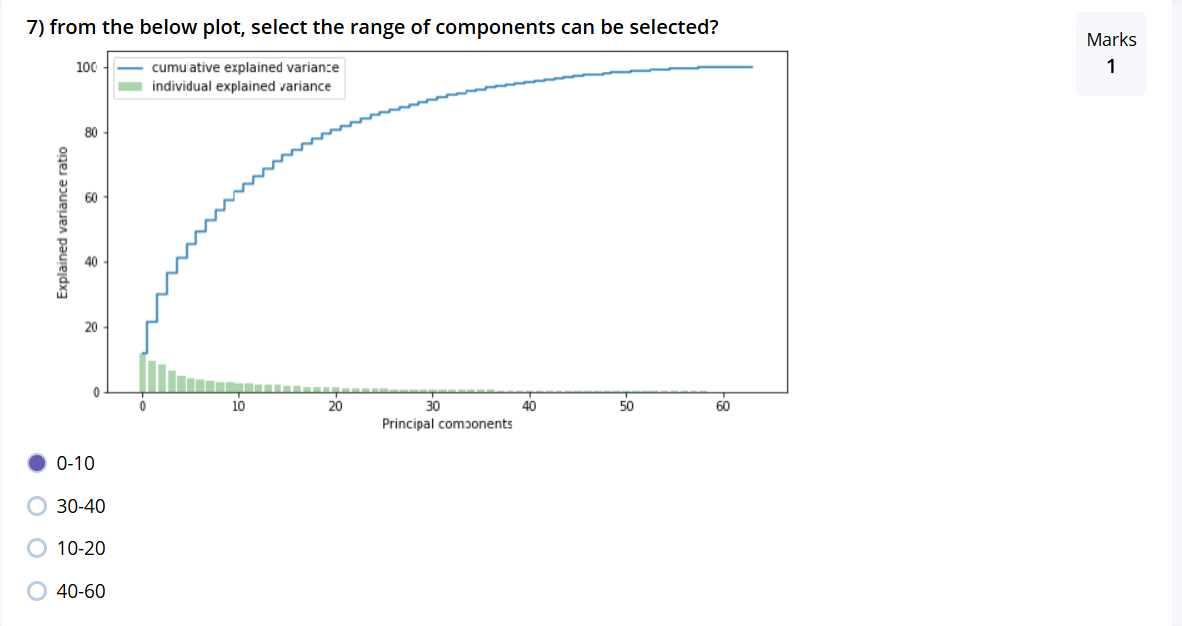

**The correct answer is 10-20**

**After the 20th component, there is not much variance left**

**8) Fit the data to PCA and compute the maximum explained_variance_ratio?**

**A. 0.9, B. 0.011, C. 0.012, D. 0.12**

In [111]:
pca = PCA()

In [112]:
pca_X = pca.fit_transform(scaled_X)

In [113]:
pca_X = pd.DataFrame(pca_X)

In [114]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-3

In [115]:
max_evr = np.max(pca.explained_variance_ratio_)

In [116]:
max_evr

0.12033916097734879

**Answer is D**

**9) Which of the following is the correct syntax for finding the eigenvalues and eigenvectors with give covariance matric (cov_mat)?**

**A. eig_vals, eig_vecs =np.linalg.eig(cov_mat)**

**B. eig_vals, eig_vecs =np.linalg.eig()**

**C. eig_vals, eig_vecs =np.eigen_val()**

**D. eig_vals, eig_vecs =np.linalg(cov_mat)**

**Answer is A**

**10) Choose the correct order of steps to choose principal components: A . compute the covariance matrix. B. choose the principal components from Eigen values and Vectors. C. collecting the data. D. compute Eigen values and vectors. E.  standardization.**

**A. E->D->C->D->B**

**B. A->C->E->D->B**

**C. none of the above**

**D. C->E->A->D->B**

**Answer is D**

**11) What correction is required in the following lines of code to create covariance matrix?**

**scaler = StandardScaler(), standardized_data = scaler.fit_transform(data), covariance_matrix = np.cov(standardized_data)**

**A. Need to flatten the standardized_data.**

**B. Need to perform transpose of standardized_data**

**C. Need to find eigen values and eigen Vectors before standardization.**

**D. All of the above**

**Answer is B**

**When we calculate the covariance matrix using Numpy, it considers rows as features and columns as observations by default. Hence, we perform the transpose, so the rows are represented as observation and column as features**

**In Pandas Dataframe, we have .cov() method to calculate covariance, we don't need to perform transpose if we are using pandas function .cov() to calculate covariance because in dataframe, columns are taken as features and rows as observations by default**

**12) What exactly do you understand by the given code?**

**pca = PCA(n_components=0.95)**

**A. The components should have 0.95 probability in the dataset.**

**B. We are looking for the principal components that cumulatively explain 95% of the variance in the data.**

**C. We are looking for the components that explains 95% of the standard deviation in the data.**

**D. We are looking for the components that accumulated to the total of 95% of the mean in the data.**

**Answer is B**

**13) How is the first principal component determined in PCA?**

**A. It is the component with the least variance.**

**B. It is the component with the median variance.**

**C. It is randomly selected.**

**D. It is the component with the most variance.**

**Answer is D**

**14) 14) Which of the following non-zero vector stays parallel after matrix multiplication**

**A. EigenVector, B. Covariance vector, C. EigenValue D. Explained variance ratio**

**Answer is A**

**Ax = (lambda)x When we multiply an eigen vector with another matrix, the resultant vecotor takes the shape of eigen vector. If you multiply a 2x2 matrix with an eign vecotor 2x1, the resultant matrix is 2x1. The resultant matrix has the same shape as eigen vector. Hence, it stays parallel, only the eigen values, that is the magnitude changes**

**15) The Output of PCA is always a new representation of data with a lower dimension than the original data representation.**

**False, True**

**Answer is True**

**16) What is the difference between PCA and Linear Regression?**

**A. Horizontal distance calculated in PCA, Manhattan distance calculated in Linear Regression.**

**B. Vertical distance calculated in PCA, Euclidean distance calculated in Linear Regression**

**C. Euclidean distance calculated in PCA, Vertical distance calculated in Linear Regression.**

**D. Manhattan distance calculated in PCA, Horizontal distance calculated in Linear Regression**

**Answer is B**

**17) How to Determine the number of principal components to retain in PCA?**

**A. None of the above**

**B. Elbow plot**

**C. Residual plot**

**D. Cumulative variance plot**

**Answer is D**